In [1]:
import astropy.table as apt

In [2]:
import astropy.coordinates as coord

In [3]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [18]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [7]:
pwd

u'/Users/crhisbenitez/Documents/Tesis (Co\u0301digo)'

In [ ]:
rq1 = apt.Table.read('1602743375532O-result.vot')

In [ ]:
rq1.keys()

In [ ]:
is_duplicated = np.array(rq1['duplicated_source'])

In [ ]:
rq=rq1[[not b for b in is_duplicated]]

In [ ]:
plt.scatter(rq1['l'][abs(np.sin(np.deg2rad(rq1['b']))/rq1['parallax'])<=7.5],rq1['b'][abs(np.sin(np.deg2rad(rq1['b']))/rq1['parallax'])<=7.5],s=2,alpha=.5)

In [ ]:
plt.scatter(rq['l'][abs(np.sin(np.deg2rad(rq['b']))/rq['parallax'])<=7.5],rq['b'][abs(np.sin(np.deg2rad(rq['b']))/rq['parallax'])<=7.5],s=2,alpha=.5)

In [ ]:
plt.hist(rq['parallax_error']/rq['parallax']**2*1000,bins=50)

In [11]:
import matplotlib as mpl

In [12]:
mpl.rcParams['agg.path.chunksize'] = 10000

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(1000./rq['parallax']*np.cos(rq['b']*np.pi/180.)*np.cos(rq['l']*np.pi/180.),1000./rq['parallax']*np.cos(rq['b']*np.pi/180.)*np.sin(rq['l']*np.pi/180.),s=2,alpha=.5)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(1000./rq['parallax']*np.cos(rq['b']*np.pi/180.)*np.cos(rq['l']*np.pi/180.),1000./rq['parallax']*np.sin(rq['b']*np.pi/180.),s=2,alpha=.5)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(1000./rq1['parallax']*np.cos(rq1['b']*np.pi/180.),1000./rq1['parallax']*np.sin(rq1['b']*np.pi/180.),s=2,alpha=.5)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(rq1['pmra'],rq1['pmdec'],s=2,alpha=.5)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.hist2d(rq1['pmra'],rq1['pmdec'],bins=10)
plt.show()

In [ ]:
ag = 192.85948*np.pi/180
dg = 27.12825*np.pi/180

In [ ]:
C1 = np.sin(dg)*np.cos(rq['dec']*np.pi/180)-np.cos(dg)*np.sin(rq['dec']*np.pi/180)*np.cos(rq['ra']*np.pi/180-ag)
C2 = np.cos(dg)*np.sin(rq['ra']*np.pi/180-ag)

In [ ]:
ml = 1/np.sqrt(C1*C1+C2*C2)*(C1*rq['ra']+C2*rq['dec'])
mb = 1/np.sqrt(C1*C1+C2*C2)*(-C2*rq['ra']+C1*rq['dec'])

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(rq['l'],rq['radial_velocity']*rq['parallax']/1000.,s=2,alpha=.5)
plt.show()

In [ ]:
len(ml2p)

In [ ]:
fc = 1./60./60./1000.*np.pi/180./365.25*24*60*60*u.km.in_units(u.kpc)

In [ ]:
u.km.in_units(u.kpc)

In [ ]:
m2p = rq[abs(np.sin(np.deg2rad(rq['b']))/rq['parallax'])<=.007]
ml2p = ml[abs(np.sin(np.deg2rad(rq['b']))/rq['parallax'])<=.007]
plt.figure(figsize=(5,5))
plt.scatter(m2p["l"],m2p["pmra"],s=2,alpha=.5)
plt.show()

In [ ]:
dist = coord.Distance(1/m2p['parallax'], u.kpc)
c = coord.SkyCoord(ra=m2p['ra'], 
                   dec=m2p['dec'],
                   distance=dist,
                   pm_ra_cosdec=m2p['pmra'], 
                   pm_dec=m2p['pmdec'],
                   radial_velocity=m2p['radial_velocity'])

In [48]:
from astropy.coordinates import ICRS
from astropy.coordinates import SphericalDifferential
from astropy.coordinates import Galactic

In [ ]:
m2p.keys()

In [ ]:
s = m2p['pmdec']

In [ ]:
s.data

In [ ]:
?ICRS

In [ ]:
icrs = ICRS(ra=m2p['ra'].data*u.degree, dec=m2p['dec'].data*u.degree,\
            distance = 1./m2p['parallax'].data*u.kpc,\
            pm_ra_cosdec=m2p['pmra'].data*np.cos(m2p['dec'].data*np.pi/180.)*u.mas/u.yr,\
            pm_dec=m2p['pmdec'].data*u.mas/u.yr,\
           radial_velocity = m2p['radial_velocity'].data*u.km/u.s)  
icrs2 = ICRS(ra=m2p['ra'].data*u.degree, dec=m2p['dec'].data*u.degree,\
            distance = 1./m2p['parallax'].data*u.kpc,\
            pm_ra_cosdec=m2p['pmra'].data*u.mas/u.yr,\
            pm_dec=m2p['pmdec'].data*u.mas/u.yr,\
           radial_velocity = m2p['radial_velocity'].data*u.km/u.s)  

In [ ]:
dc = icrs.transform_to(Galactic) 
dc2 = icrs2.transform_to(Galactic) 

In [ ]:
np.array(dc.pm_l_cosb*u.mas.in_units(u.rad)/u.yr.in_units(u.s)*u.kpc.in_units(u.km))

In [ ]:
fc = u.mas.in_units(u.rad)/u.yr.in_units(u.s)*u.kpc.in_units(u.km)

In [ ]:
fc

In [ ]:
dc.pm_l_cosb.info

In [ ]:
plt.figure(figsize=(5,5))
#plt.scatter(dc.l,dc.pm_l_cosb,s=2,alpha=.5)
#plt.scatter(dc.l,dc.pm_l_cosb/1000*fc,s=2,alpha=.5)
plt.scatter(dc2.l,dc2.pm_l_cosb/1000*fc,s=2,alpha=.5)
plt.show()

In [ ]:
rq1[rq1['source_id']==4472832130942575872]

In [ ]:
plt.figure(figsize=(10,5))
plt.hist2d(dc2.l,dc2.pm_l_cosb*fc,bins=50,range=[[0,360], [-1000, 1000]])
plt.colorbar()
plt.show()

In [47]:
from astropy.coordinates import GalacticLSR

In [ ]:
dcLSR = icrs.transform_to(GalacticLSR) 
dcLSR2 = icrs2.transform_to(GalacticLSR) 

In [ ]:
dcLSR

In [ ]:
fc

In [ ]:
np.array(dcLSR.pm_l_cosb).min()

In [9]:
print dcLSR.distance.kiloparsec

NameError: name 'dcLSR' is not defined

In [ ]:
print 

In [ ]:
print dcLSR.pm_l_cosb.value*fc

In [ ]:
aux = (dcLSR.pm_l_cosb.value*fc-(10.1*np.sin(dcLSR.l.value*np.pi/180.)-22.5*np.cos(dcLSR.l.value*np.pi/180.))/dcLSR.distance.kiloparsec)/np.cos(dcLSR.b.value*np.pi/180.)

In [ ]:
plt.figure(figsize=(8,5))
#plt.scatter(dc.l,dc.pm_l_cosb,s=2,alpha=.5)
#plt.scatter(dc.l,dc.pm_l_cosb/1000*fc,s=2,alpha=.5)
#plt.scatter(dcLSR.ra,dcLSR.pm_ra_cosdec/1000*fc,s=2,alpha=.5)
plt.scatter(dcLSR.l,aux,s=2,alpha=.3)
#plt.scatter(dcLSR.l,dcLSR.pm_l_cosb.value*fc/np.cos(dcLSR.b.value*np.pi/180.),s=2,alpha=.3)
#plt.scatter(dcLSR.l,(10.1*np.sin(dcLSR.l.value*np.pi/180.)-22.5*np.cos(dcLSR.l.value*np.pi/180.))/dcLSR.distance.kiloparsec/np.cos(dcLSR.b.value*np.pi/180.),s=2,alpha=.3)
#plt.ylim(-200,200)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.hist2d(dcLSR.l,aux,bins=50,cmax=80,cmin=0,range=[[0,360], [-500, 500]])
plt.colorbar()
plt.show()

In [ ]:
1./1000.*fc

In [ ]:
m2p.keys()

In [ ]:
plt.plot(m2p['phot_g_mean_mag']+5*np.log10(m2p['parallax']/1000.)-m2p['a_g_val'])

In [ ]:
m2p['bp_rp']

In [ ]:
plt.scatter(m2p['phot_g_mean_mag']+5*np.log10(m2p['parallax']/1000.)-m2p['a_g_val'],m2p['bp_rp'])

______________

In [ ]:
plt.figure(figsize=(5,5))
#plt.scatter(dc.l,dc.pm_l_cosb,s=2,alpha=.5)
plt.scatter(m2p['pmra'],dc.pm_l_cosb,s=2,alpha=.5)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(rq1['l'],(ml*4.74047-rq1['parallax']*(11*np.sin(rq1['l']*np.pi/180)-22*np.cos(rq1['l']*np.pi/180))),s=2,alpha=.5)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(rq1['b'],mb*4.74047,s=2,alpha=.5)
plt.show()

In [ ]:
rq2 = rq1[abs(rq1['b'])<20]

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(1000./rq2['parallax']*np.cos(rq2['l']*np.pi/180.),1000./rq2['parallax']*np.sin(rq2['l']*np.pi/180.),s=2,alpha=.5)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(1000./rq2['parallax']*np.cos(rq2['b']*np.pi/180.),1000./rq2['parallax']*np.sin(rq2['b']*np.pi/180.),s=2,alpha=.5)
plt.show()

In [ ]:
C1 = np.sin(dg)*np.cos(rq2['dec']*np.pi/180)-np.cos(dg)*np.sin(rq2['dec']*np.pi/180)*np.cos(rq2['ra']*np.pi/180-ag)
C2 = np.cos(dg)*np.sin(rq2['ra']*np.pi/180-ag)

In [ ]:
ml = 1/np.sqrt(C1*C1+C2*C2)*(C1*rq2['pmra']+C2*rq2['pmdec'])
mb = 1/np.sqrt(C1*C1+C2*C2)*(-C2*rq2['pmra']+C1*rq2['pmdec'])

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(rq2['l'],rq2['radial_velocity']*rq2['parallax'],s=2,alpha=.5)
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
#plt.scatter(rq2['l'],(ml*4.74047),s=2,alpha=.5)
plt.scatter(rq2['l'],(ml*4.74047-rq2['parallax']*(10*np.sin(rq2['l']*np.pi/180)-20*np.cos(rq2['l']*np.pi/180)))/np.cos(rq2['b']*np.pi/180),s=2,alpha=.5)

plt.show()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(rq2['l'],mb*4.74047,s=2,alpha=.5)
plt.show()

____

In [6]:
from astropy.table import QTable

In [34]:
from astropy.coordinates import GalacticLSR
from astropy.coordinates import ICRS
from astropy.coordinates import SphericalDifferential
from astropy.coordinates import Galactic

In [7]:
query_text = '''SELECT TOP 5000 ra, dec, parallax, pmra, pmdec, radial_velocity,
ra_error, dec_error, parallax_error, pmra_error, pmdec_error, radial_velocity_error, l, b,
phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag, bp_rp, a_g_val, e_bp_min_rp_val, phot_bp_rp_excess_factor,
duplicated_source, source_id, astrometric_chi2_al, astrometric_n_obs_al
FROM gaiadr2.gaia_source
WHERE parallax_over_error > 10 AND
    parallax > 2 AND
    radial_velocity IS NOT null AND
    pmra IS NOT null AND
    pmdec IS NOT null AND
    phot_bp_mean_flux_over_error > 10 AND
    phot_rp_mean_flux_over_error > 10
ORDER BY random_index
'''

In [8]:
gaia_data = apt.Table.read('tryLi.vot')

In [205]:
extracol = apt.Table.read('extracol.vot')

In [206]:
gaiadata.keys()

['ra',
 'dec',
 'parallax',
 'pmra',
 'pmdec',
 'radial_velocity',
 'ra_error',
 'dec_error',
 'parallax_error',
 'pmra_error',
 'pmdec_error',
 'radial_velocity_error',
 'l',
 'b',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'bp_rp',
 'a_g_val',
 'e_bp_min_rp_val',
 'phot_bp_rp_excess_factor',
 'duplicated_source',
 'source_id',
 'astrometric_chi2_al',
 'astrometric_n_obs_al']

In [229]:
gaia_data.add_column(extracol['astrometric_n_good_obs_al'],name='astrometric_n_good_obs_al')

In [270]:
#gaiadata = gaia_data[abs(np.sin(gaia_data['b']*np.pi/180)/gaia_data['parallax'])<.035]
gaiadata = gaia_data[abs(gaia_data['b'])<20]
gaiadata = gaiadata[gaiadata['parallax']<10]
gaiadata = gaiadata[gaiadata['duplicated_source']==False]

In [271]:
auxf1 = 1+.015*(gaiadata['bp_rp'])**2
auxf2 = gaiadata['phot_bp_rp_excess_factor']

In [272]:
gaiadata = gaiadata[(auxf1-auxf2)<0]

In [273]:
auxf2 = gaiadata['phot_bp_rp_excess_factor']
auxf3 = 1.3+.06*(gaiadata['bp_rp'])**2

In [274]:
gaiadata = gaiadata[(auxf3-auxf2)>0]

In [275]:
auxf4 = np.sqrt(gaiadata['astrometric_chi2_al']*1./(gaiadata['astrometric_n_good_obs_al']-5.))

In [276]:
auxf5 = np.exp(-.2*(gaiadata['phot_g_mean_mag']-19.5))

In [277]:
auxf5[auxf5<1]

<MaskedColumn name='phot_g_mean_mag' dtype='float32' length=0>

In [269]:
#gaiadata = gaiadata[(gaiadata['phot_bp_mean_mag']-gaiadata['phot_rp_mean_mag'] - gaiadata['e_bp_min_rp_val'])<2.]

In [26]:
#gaiadata = gaiadata[(gaiadata['phot_bp_mean_mag']-gaiadata['phot_rp_mean_mag'] - gaiadata['e_bp_min_rp_val'])>1.6]

In [278]:
xvar = gaiadata['phot_g_mean_mag']+5*np.log10(gaiadata['parallax']/100.)-gaiadata['a_g_val']
yvar = gaiadata['phot_bp_mean_mag']-gaiadata['phot_rp_mean_mag'] - gaiadata['e_bp_min_rp_val']

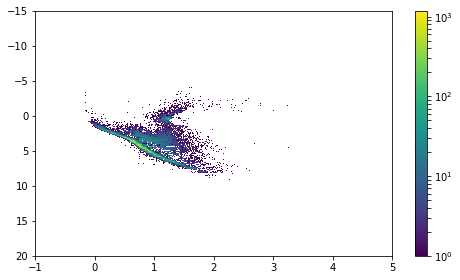

In [279]:
plt.figure(figsize=(8,4.5))
plt.hist2d(yvar,xvar,bins=500,cmin=0,norm=mpl.colors.LogNorm())
plt.colorbar()
plt.xlim(-1,5)
plt.ylim(-15,20)
plt.gca().invert_yaxis()
plt.show()

In [280]:
icrs = ICRS(ra=gaiadata['ra'].data*u.degree, dec=gaiadata['dec'].data*u.degree,\
            distance = 1./gaiadata['parallax'].data*u.kpc,\
            pm_ra_cosdec=gaiadata['pmra'].data*np.cos(gaiadata['dec'].data*np.pi/180.)*u.mas/u.yr,\
            pm_dec=gaiadata['pmdec'].data*u.mas/u.yr,\
           radial_velocity = gaiadata['radial_velocity'].data*u.km/u.s)  

In [281]:
dist = coord.Distance(1./gaiadata['parallax'], u.kpc)

In [282]:
dcLSR = icrs.transform_to(GalacticLSR) 

In [283]:
fc = u.mas.in_units(u.rad)/u.yr.in_units(u.s)*u.kpc.in_units(u.km)

In [284]:
np.max(gaiadata['pmra'])*u.mas.in_units(u.rad)/u.yr.in_units(u.s)*u.kpc.in_units(u.km),\
np.max(gaiadata['pmra'])*4.8481368e-9/3.154e+7*3.086e+16

(3000.764157041203, 3002.7523622673807)

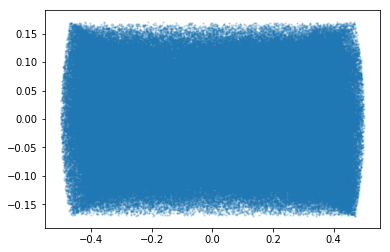

In [285]:
plt.scatter(np.cos(gaiadata['b']*np.pi/180.)*np.cos(gaiadata['l']*np.pi/180.)/gaiadata['parallax'],\
           np.sin(gaiadata['b']*np.pi/180.)/gaiadata['parallax'],s=2,alpha=.2)

In [286]:
np.max(dcLSR.pm_l_cosb.value)

622.9926768216544

In [287]:
Picrs = np.array([-np.sin(gaiadata['ra']*np.pi/180),np.cos(gaiadata['ra']*np.pi/180),np.zeros_like(gaiadata['ra'])]).T
Qicrs = np.array([-np.cos(gaiadata['ra']*np.pi/180)*np.sin(gaiadata['dec']*np.pi/180),-np.sin(gaiadata['ra']*np.pi/180)*np.sin(gaiadata['dec']*np.pi/180),np.cos(gaiadata['dec']*np.pi/180)]).T
Pgal = np.array([-np.sin(gaiadata['l']*np.pi/180),np.cos(gaiadata['l']*np.pi/180),np.zeros_like(gaiadata['l'])]).T
Qgal = np.array([-np.cos(gaiadata['l']*np.pi/180)*np.sin(gaiadata['b']*np.pi/180),-np.sin(gaiadata['l']*np.pi/180)*np.sin(gaiadata['b']*np.pi/180),np.cos(gaiadata['b']*np.pi/180)]).T

In [288]:
mmicrs = np.array(Picrs*gaiadata['pmra'][:,np.newaxis] + Qicrs*gaiadata['pmdec'][:,np.newaxis])

In [289]:
Ag = np.array([[-0.0548755604162154,-0.8734370902348850,-0.4838350155487132],\
               [+0.4941094278755837,-0.4448296299600112,+0.7469822444972189],\
               [-0.8676661490190047,-0.1980763734312015,+0.4559837761750669]])

In [290]:
mmicrs[0]

array([-12.43802222, -12.89882939, -22.15758422])

In [291]:
mmgal = np.array([Ag.dot(m) for m in mmicrs])

In [292]:
mml = (Pgal*mmgal).sum(1)

In [293]:
mmb = (Qgal*mmgal).sum(1)

In [294]:
rterm = (10.1*np.sin(dcLSR.l.value*np.pi/180.)-22.5*np.cos(dcLSR.l.value*np.pi/180.))/dcLSR.distance.kiloparsec/np.cos(dcLSR.b.value*np.pi/180.)
aux = mml*fc/np.cos(dcLSR.b.value*np.pi/180.)
#aux = dcLSR.pm_l_cosb.value*fc

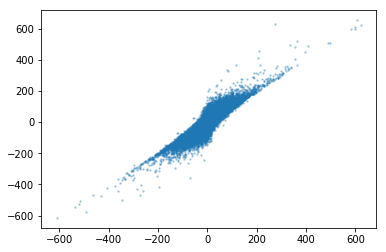

In [295]:
plt.scatter(dcLSR.pm_l_cosb,mml,s=2,alpha=.3)

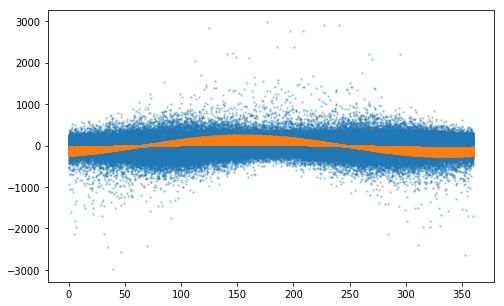

In [296]:
plt.figure(figsize=(8,5))
#plt.scatter(dc.l,dc.pm_l_cosb,s=2,alpha=.5)
#plt.scatter(dc.l,dc.pm_l_cosb/1000*fc,s=2,alpha=.5)
#plt.scatter(dcLSR.ra,dcLSR.pm_ra_cosdec/1000*fc,s=2,alpha=.5)
plt.scatter(dcLSR.l,aux-rterm,s=2,alpha=.3)
plt.scatter(dcLSR.l,rterm,s=2,alpha=.3)
#plt.scatter(dcLSR.l,dcLSR.pm_l_cosb.value*fc/np.cos(dcLSR.b.value*np.pi/180.),s=2,alpha=.3)
#plt.scatter(dcLSR.l,(10.1*np.sin(dcLSR.l.value*np.pi/180.)-22.5*np.cos(dcLSR.l.value*np.pi/180.))/dcLSR.distance.kiloparsec/np.cos(dcLSR.b.value*np.pi/180.),s=2,alpha=.3)
#plt.ylim(-400,400)
plt.show()

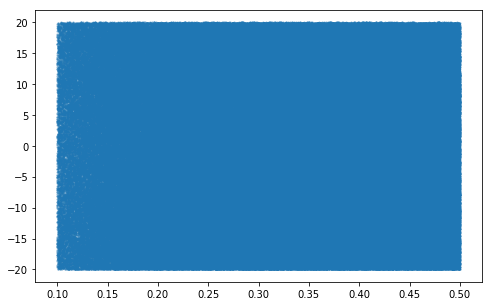

In [297]:
plt.figure(figsize=(8,5))
plt.scatter(dcLSR.distance,dcLSR.b,s=2,alpha=.3)
plt.show()

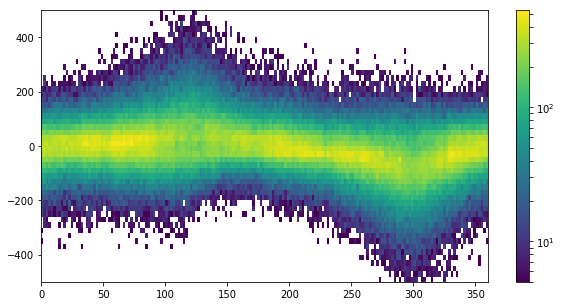

In [300]:
plt.figure(figsize=(10,5))
#plt.scatter(dcLSR.l,-rterm)
#plt.hist2d(dcLSR.l,aux-rterm,bins=[180,50],cmin=5,range=[[0,360], [-300, 300]],norm=mpl.colors.LogNorm())
plt.hist2d(dcLSR.l,gaiadata['pmra']*fc,bins=[180,50],cmin=5,range=[[0,360], [-500, 500]],norm=mpl.colors.LogNorm())
plt.colorbar()
plt.show()

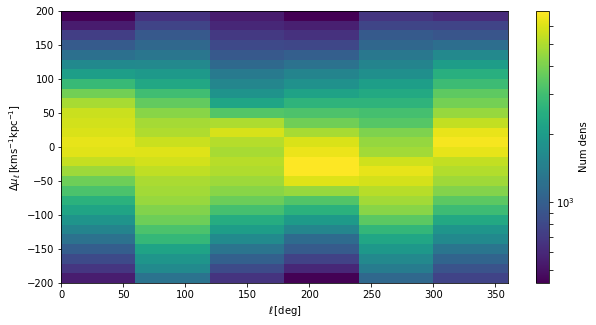

In [346]:
plt.figure(figsize=(10,5))
#plt.scatter(dcLSR.l,-rterm)
plt.hist2d(dcLSR.l,aux-rterm,bins=[6,28],cmin=30,range=[[0,360], [-200, 200]],norm=mpl.colors.LogNorm())
#plt.hist2d(dcLSR.l,mml*fc/np.cos(dcLSR.b),bins=[180,50],cmin=5,range=[[0,360], [-200, 200]],norm=mpl.colors.LogNorm())
cbar = plt.colorbar()
cbar.set_label("Num dens", rotation=90)
plt.xlabel("$\ell \, [\mathrm{deg}]$")
plt.ylabel("$\Delta\mu_{\ell} \, [\mathrm{kms^{-1}kpc^{-1}}]$")
plt.show()

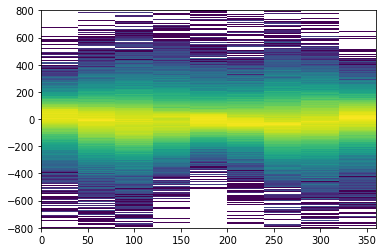

In [375]:
hist = plt.hist2d(dcLSR.l,aux-rterm,bins=[9,800],cmin=0,range=[[0,360], [-800, 800]],norm=mpl.colors.LogNorm())

In [376]:
vaux = np.array([(hist[2][i+1]+hist[2][i])/2. for i in range(len(hist[2])-1)])
laux = np.array([(hist[1][i+1]+hist[1][i])/2. for i in range(len(hist[1])-1)])

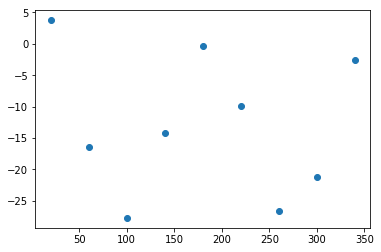

In [377]:
plt.scatter(laux,[sum(vaux*hist[0][i])/sum(hist[0][i]) for i in range(len(hist[0]))])

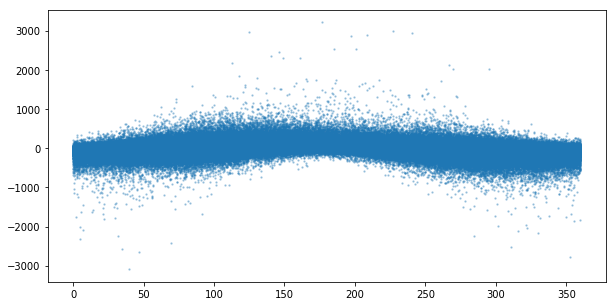

In [302]:
plt.figure(figsize=(10,5))
#plt.scatter(dcLSR.l,-rterm)
#plt.hist2d(dcLSR.l,aux-rterm,bins=[180,50],cmin=5,range=[[0,360], [-300, 300]],norm=mpl.colors.LogNorm())
plt.scatter(dcLSR.l,mml*fc/np.cos(dcLSR.b),s=2,alpha=.3)

plt.show()

In [118]:
np.min(aux)/1000

-1.6156720659001464